In [327]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [328]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [329]:
data.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [330]:
data.shape

(1253, 23)

In [331]:
data.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

In [332]:
data.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [333]:
df_sliced = data[
    ['Seniority level', 'Gender', 'City', 'Employment status', 'Main language at work', 'Age', 'Company size',
     'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR']]

df_sliced.head()

,Seniority level,Gender,City,Employment status,Main language at work,Age,Company size,Total years of experience,Yearly brutto salary (without bonus and stocks) in EUR
0,Senior,Male,Munich,Full-time employee,English,26.0,51-100,5,80000.0
1,Senior,Male,Berlin,Full-time employee,English,26.0,101-1000,7,80000.0
2,Lead,Male,Berlin,Self-employed (freelancer),English,29.0,101-1000,12,120000.0
3,Junior,Male,Berlin,Full-time employee,English,28.0,51-100,4,54000.0
4,Senior,Male,Berlin,Full-time employee,English,37.0,101-1000,17,62000.0


In [334]:
pd.options.mode.chained_assignment = None

df_sliced['Total years of experience'] = pd.to_numeric(df_sliced['Total years of experience'], errors='coerce',
                                                       downcast='float')

df_sliced.dtypes

pd.options.mode.chained_assignment = 'warn'

In [335]:
data_new = df_sliced.dropna(axis=0, how='any')
data_new.shape

(1182, 9)

In [336]:
data_new.dtypes

Seniority level                                            object
Gender                                                     object
City                                                       object
Employment status                                          object
Main language at work                                      object
Age                                                       float64
Company size                                               object
Total years of experience                                 float32
Yearly brutto salary (without bonus and stocks) in EUR    float64
dtype: object

In [337]:
data_new.isnull().sum()

Seniority level                                           0
Gender                                                    0
City                                                      0
Employment status                                         0
Main language at work                                     0
Age                                                       0
Company size                                              0
Total years of experience                                 0
Yearly brutto salary (without bonus and stocks) in EUR    0
dtype: int64

In [338]:
oe = OrdinalEncoder()
oe_cols = oe.fit_transform(
    data_new[['Gender', 'City', 'Seniority level', 'Main language at work', 'Employment status', 'Company size']])

data_new[['Gender', 'City', 'Seniority level', 'Main language at work', 'Employment status', 'Company size']] = oe_cols

data_new.shape

C:\Users\Xiaomi\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


(1182, 9)

In [339]:
data_new.dtypes

Seniority level                                           float64
Gender                                                    float64
City                                                      float64
Employment status                                         float64
Main language at work                                     float64
Age                                                       float64
Company size                                              float64
Total years of experience                                 float32
Yearly brutto salary (without bonus and stocks) in EUR    float64
dtype: object

In [340]:
data_new.head()

,Seniority level,Gender,City,Employment status,Main language at work,Age,Company size,Total years of experience,Yearly brutto salary (without bonus and stocks) in EUR
0,15.0,2.0,74.0,1.0,2.0,26.0,3.0,5.0,80000.0
1,15.0,2.0,5.0,1.0,2.0,26.0,1.0,7.0,80000.0
2,8.0,2.0,5.0,5.0,2.0,29.0,1.0,12.0,120000.0
3,6.0,2.0,5.0,1.0,2.0,28.0,3.0,4.0,54000.0
4,15.0,2.0,5.0,1.0,2.0,37.0,1.0,17.0,62000.0


<AxesSubplot:>

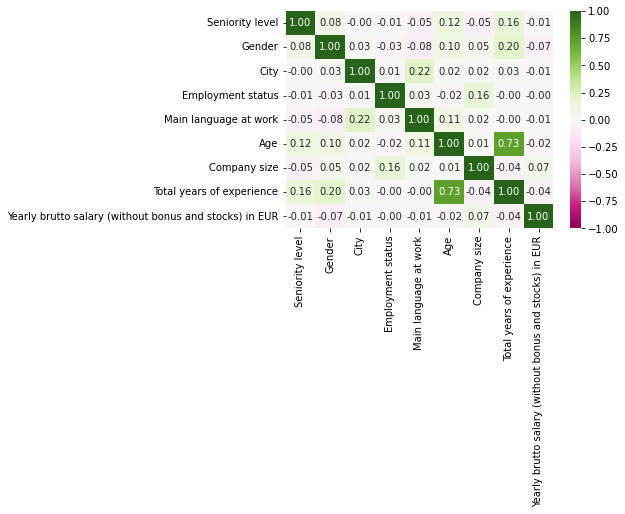

In [341]:
sns.heatmap(data_new.corr(), annot=True, cmap="PiYG", fmt=".2f", vmin=-1, vmax=1)

In [342]:
sc = MinMaxScaler()

df_scaled = data_new.copy()

for i in data_new.columns:
    df_scaled[[i]] = sc.fit_transform(data_new[[i]])

df_scaled.describe()

,Seniority level,Gender,City,Employment status,Main language at work,Age,Company size,Total years of experience,Yearly brutto salary (without bonus and stocks) in EUR
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,0.551043,0.921743,0.274681,0.124271,0.214467,0.271206,0.290186,0.219387,0.000970
std,0.168273,0.184063,0.296359,0.079422,0.115102,0.119932,0.294554,0.131183,0.029083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476190,1.000000,0.044248,0.111111,0.166667,0.195652,0.000000,0.125000,0.000099
50%,0.476190,1.000000,0.044248,0.111111,0.166667,0.260870,0.250000,0.200000,0.000120
75%,0.714286,1.000000,0.654867,0.111111,0.166667,0.326087,0.500000,0.300000,0.000140
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [343]:
indexes_to_remove = df_scaled[
    df_scaled['Yearly brutto salary (without bonus and stocks) in EUR'] > 0.00014].index.values

df_scaled = df_scaled.drop(labels=indexes_to_remove, axis=0)

df_fully_scaled = df_scaled.copy()

for i in df_scaled.columns:
    df_fully_scaled[[i]] = sc.fit_transform(df_scaled[[i]])

df_fully_scaled.describe()

,Seniority level,Gender,City,Employment status,Main language at work,Age,Company size,Total years of experience,Yearly brutto salary (without bonus and stocks) in EUR
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,0.488705,0.802600,0.280037,0.121487,0.220942,0.222383,0.317671,0.192541,0.734602
std,0.179742,0.398272,0.295999,0.072687,0.122573,0.127334,0.297799,0.125736,0.187487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388889,1.000000,0.044248,0.111111,0.166667,0.136364,0.000000,0.100000,0.649346
50%,0.388889,1.000000,0.044248,0.111111,0.166667,0.204545,0.250000,0.175000,0.779218
75%,0.666667,1.000000,0.654867,0.111111,0.166667,0.295455,0.500000,0.250000,0.865799
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

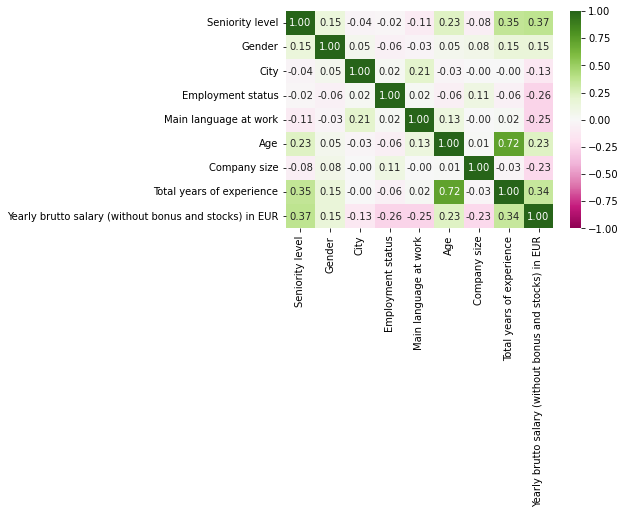

In [344]:
sns.heatmap(df_fully_scaled.corr(), annot=True, cmap="PiYG", fmt=".2f", vmin=-1, vmax=1)

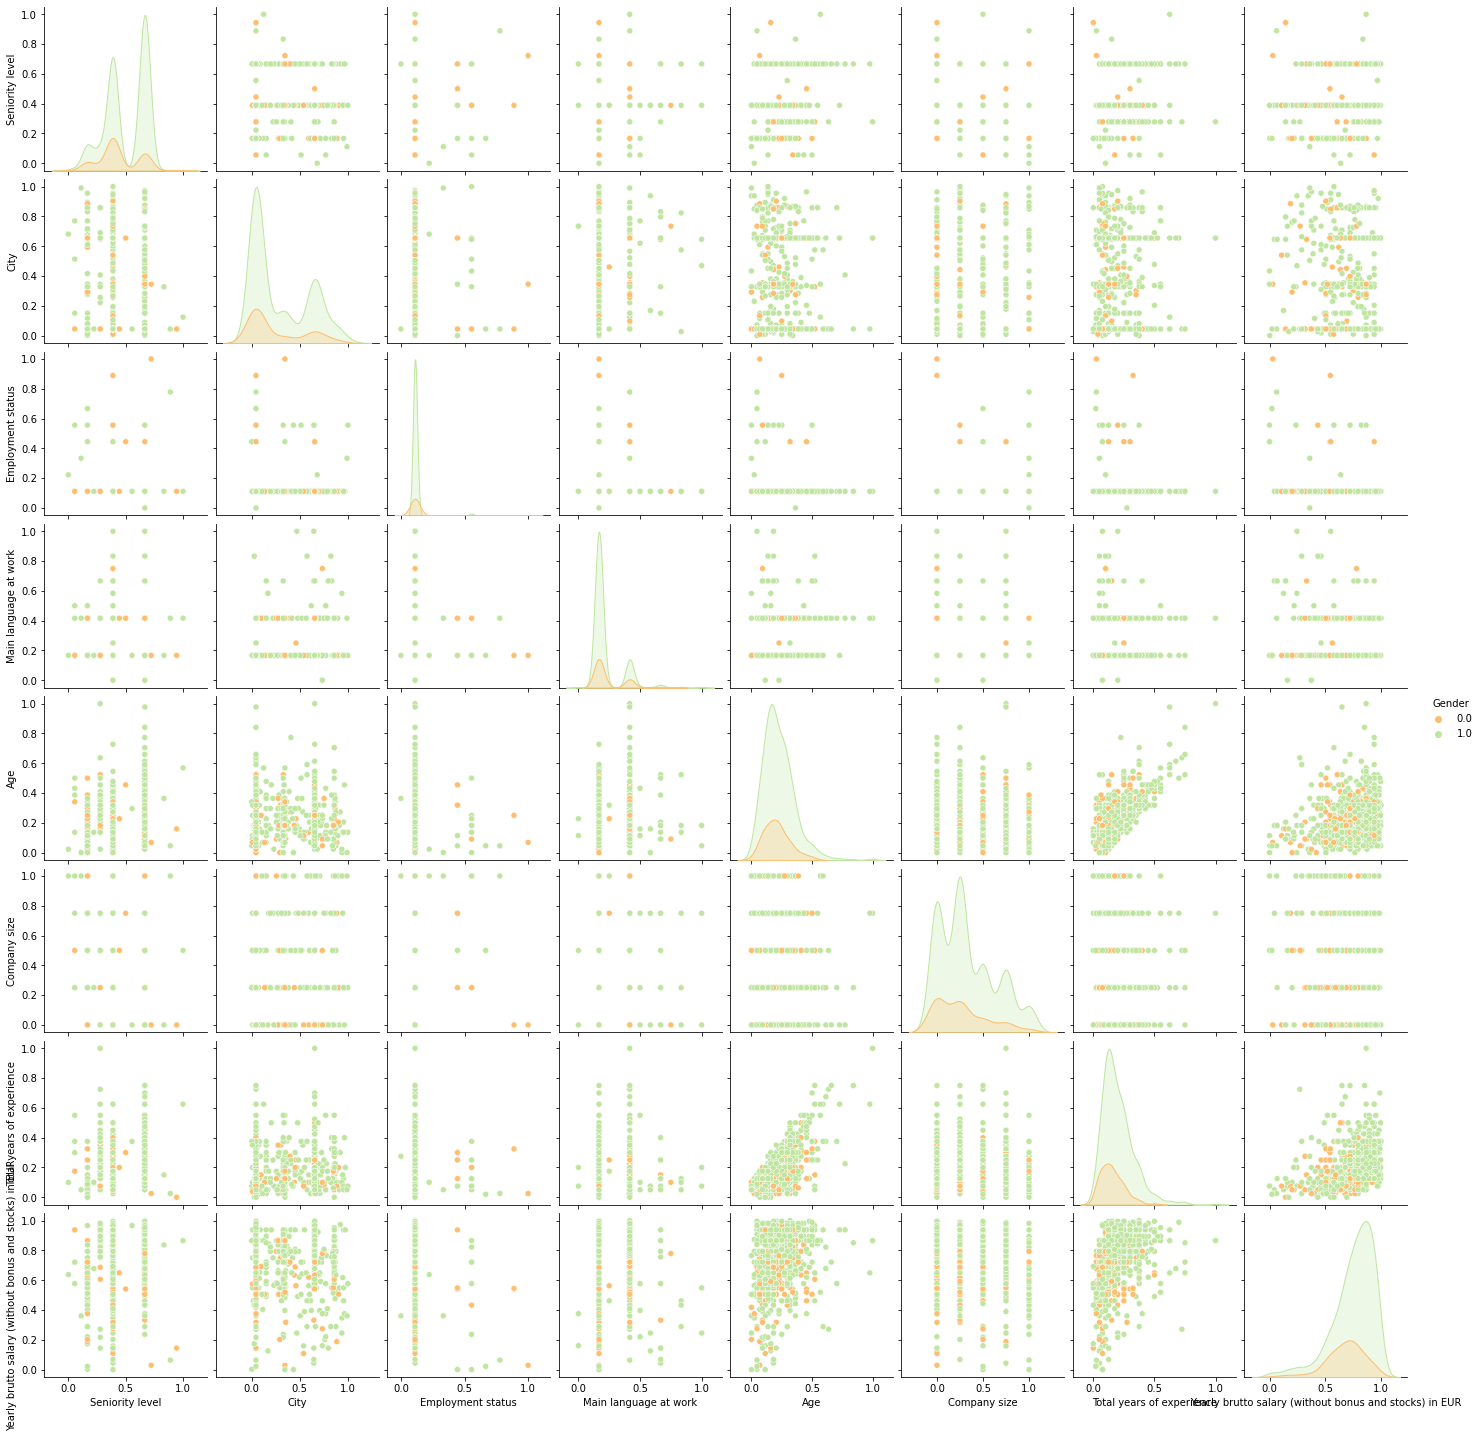

In [345]:
sns.pairplot(data=df_fully_scaled, hue='Gender', palette='Spectral')
plt.show()

In [359]:
from sklearn.model_selection import train_test_split

x = df_fully_scaled.drop(labels='Yearly brutto salary (without bonus and stocks) in EUR', axis=1)
y = df_fully_scaled['Yearly brutto salary (without bonus and stocks) in EUR']
x_cols = x.columns.tolist()
y_column = 'Yearly brutto salary (without bonus and stocks) in EUR'

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

In [360]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train, y_train)

knn_regressor_prediction = knn_regressor.predict(x_test)

In [361]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

def print_regression_metrics(y_test, y_predicted):
    abs_err = mean_absolute_error(y_test, y_predicted)
    med_abs_err = median_absolute_error(y_test, y_predicted)
    mean_sq_err = mean_squared_error(y_test, y_predicted, squared=False)
    r2 = r2_score(y_test, y_predicted)

    return f"-Средняя абсолютная ошибка = {abs_err};\
          -Медианная абсолютная ошибка = {med_abs_err};\
          \-Среднеквадратичная ошибка = {mean_sq_err};\
          -Коэффициент детерминации = {r2}."

print_regression_metrics(y_test, knn_regressor_prediction)

'-Средняя абсолютная ошибка = 0.12627000185895224;          -Медианная абсолютная ошибка = 0.0991055137880778;          \\-Среднеквадратичная ошибка = 0.17050302677974224;          -Коэффициент детерминации = 0.20754299750594818.'

In [362]:
scoring = ["neg_root_mean_squared_error", "r2"]

In [363]:
cross_validate(KNeighborsRegressor(), x, y, cv=KFold(n_splits=5), scoring=scoring, return_train_score=True)

{'fit_time': array([0.        , 0.        , 0.        , 0.01562166, 0.01562262]),
 'score_time': array([0.        , 0.01562285, 0.01563168, 0.        , 0.        ]),
 'test_neg_root_mean_squared_error': array([-0.12208134, -0.1785883 , -0.16583966, -0.17924142, -0.15088521]),
 'train_neg_root_mean_squared_error': array([-0.13481738, -0.12437639, -0.12500386, -0.12224924, -0.12805715]),
 'test_r2': array([0.05251321, 0.26989478, 0.18986053, 0.21677543, 0.37920887]),
 'train_r2': array([0.53478253, 0.5301344 , 0.55845177, 0.54985422, 0.52720725])}

In [370]:
n_range = np.array(range(1, 21, 1))
parameters_to_tune = [{'n_neighbors' : n_range}]
parameters_to_tune

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])}

In [373]:
%%time
# Решетчатый поиск со стратегией K-Fold
grid_search_reg= GridSearchCV(KNeighborsRegressor(), parameters_to_tune, cv=KFold(n_splits=10), scoring="neg_root_mean_squared_error")
grid_search_reg.fit(x, y)

Wall time: 1.25 s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_root_mean_squared_error')

In [374]:
grid_search_reg.best_params_

{'n_neighbors': 10}

In [375]:
grid_search_reg.best_score_

-0.15400467359473982

In [376]:
knn_regressor_optimized = grid_search_reg.best_estimator_
knn_regressor_optimized.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [378]:
knn_regressor_optimized_prediction = knn_regressor_optimized.predict(x_test)

In [380]:
print('K = 5: {};\nK = 10: {}.'.format(print_regression_metrics(y_test, knn_regressor_prediction),
                                       print_regression_metrics(y_test, knn_regressor_optimized_prediction)))

K = 5: -Средняя абсолютная ошибка = 0.12627000185895224;          -Медианная абсолютная ошибка = 0.0991055137880778;          \-Среднеквадратичная ошибка = 0.17050302677974224;          -Коэффициент детерминации = 0.20754299750594818.;
K = 10: -Средняя абсолютная ошибка = 0.1267607132095107;          -Медианная абсолютная ошибка = 0.10010966969220342;          \-Среднеквадратичная ошибка = 0.16936262153128034;          -Коэффициент детерминации = 0.21810820424008093..
